In [37]:
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('C:\\Users\\kaush\\Desktop\\IIT SRFP\\code\\n50.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,4675.799805,4773.100098,4675.799805,4765.299805,4765.299805,0.0
1,04-01-2012,4774.950195,4782.850098,4728.850098,4749.649902,4749.649902,0.0
2,05-01-2012,4749.000000,4779.799805,4730.149902,4749.950195,4749.950195,0.0
3,06-01-2012,4724.149902,4794.899902,4686.850098,4754.100098,4754.100098,0.0
4,07-01-2012,NaN,NaN,NaN,NaN,NaN,NaN


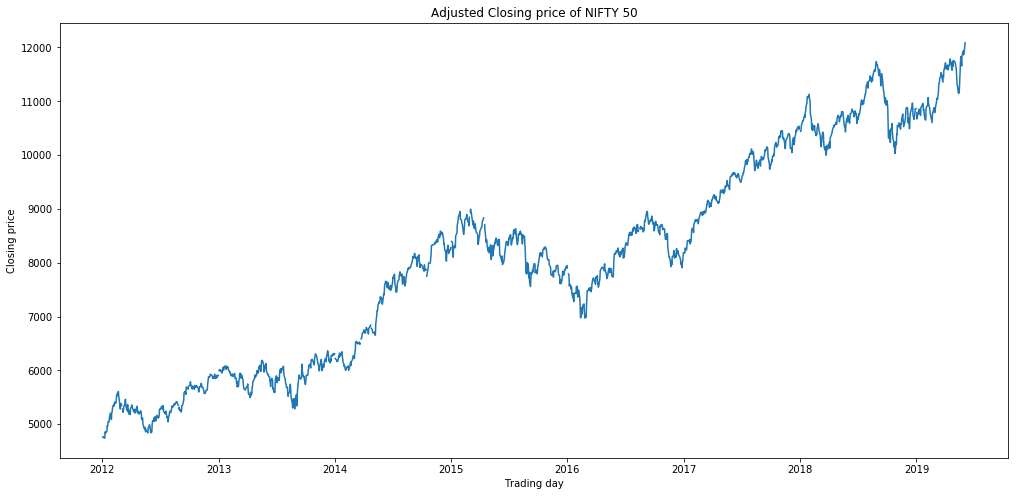

In [38]:
df['Date'] = pd.to_datetime(df.Date,format='%d-%m-%Y')
df.index = df['Date']

plt.figure(figsize=(17, 8))
plt.plot(df['Adj Close'])
plt.title('Adjusted Closing price of NIFTY 50')
plt.ylabel('Closing price')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

In [39]:
df.dtypes
drop_cols = ['Open','High','Low','Close','Volume']
df.drop(drop_cols, axis=1, inplace=True)
df.head()

tf= df.dropna()
tf.isnull().sum()

train = tf.loc['2012-01-02':'2019-01-01']
test = tf.loc['2019-01-01':'2019-06-01']

test.tail()

,Date,Adj Close
Date,,
2019-05-27,2019-05-27,11924.75000
2019-05-28,2019-05-28,11928.75000
2019-05-29,2019-05-29,11861.09961
2019-05-30,2019-05-30,11945.90039
2019-05-31,2019-05-31,11922.79981


In [40]:
import datetime as dt
import datetime as dt
tf['Date'] = pd.to_datetime(tf['Date'])
tf['Date']=tf['Date'].map(dt.datetime.toordinal)

data = tf.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(tf)),columns=['Date', 'Adj Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Adj Close'][i] = data['Adj Close'][i]

train = new_data[:1711]
valid = new_data[1711:1811]

x_train = train.drop('Adj Close', axis=1)
y_train = train['Adj Close']
x_valid = valid.drop('Adj Close', axis=1)
y_valid = valid['Adj Close']

C:\Users\kaush\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kaush\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [41]:
#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt

preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

340.3424030334381

C:\Users\kaush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\kaush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


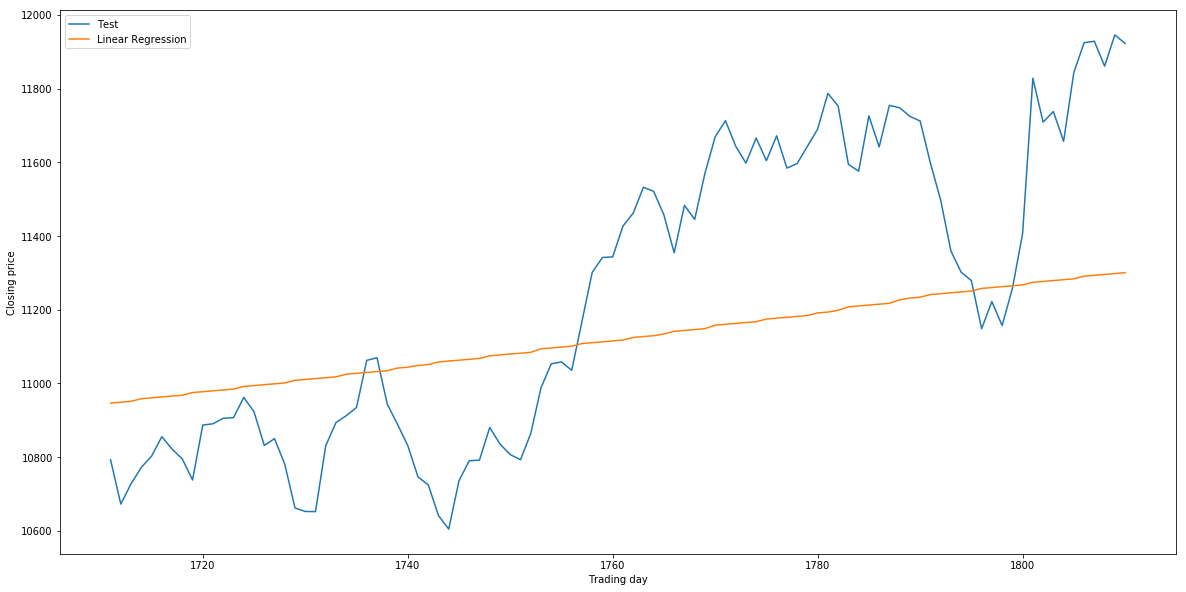

In [43]:
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[1711:1811].index
train.index = new_data[:1711].index

plt.ylabel('Closing price')
plt.xlabel('Trading day')
plt.plot(valid['Adj Close'], label='Test')
plt.plot(valid['Predictions'], label='Linear Regression') 
plt.legend(loc='best')
plt.show()
